In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from ipywidgets import interact
from tqdm.auto import tqdm
from eventio import SimTelFile
from lstchain import mc
import glob
import math

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
#%matplotlib widget

In [28]:
datafile = "/Users/vdk/UnrealLST/simtel_investigations/MONOSTEREO_run1001_muon.simtel.gz"
datafile = "/Users/vdk/UnrealLST/simtel_investigations/STEREOSTEREO_run1001_muon.simtel.gz"
datafile = "/Users/vdk/UnrealLST/simtel_investigations/ARRAYSTEREO_run1001_muon.simtel.gz"
#datafile = "/home/voutsi/Work/TriggerStudies/analysis/Electrons_data/simtel_corsika_theta_52.374_az_216.698_run4.simtel.gz"
source = SimTelFile(datafile)
source.mc_run_headers[0]


{'shower_prog_id': 1,
 'shower_prog_vers': 7710,
 'shower_prog_start': 1699444800,
 'detector_prog_id': 1,
 'detector_prog_vers': 1593356843,
 'detector_prog_start': 1700501104,
 'obsheight': 2199.0,
 'n_showers': 20000,
 'n_use': 1,
 'core_pos_mode': 1,
 'core_range': array([  0., 150.], dtype=float32),
 'alt_range': array([1.5707964, 1.5707964], dtype=float32),
 'az_range': array([3.1415927, 3.1415927], dtype=float32),
 'diffuse': 1,
 'viewcone': array([0. , 3.5], dtype=float32),
 'E_range': array([0.008418, 1.      ], dtype=float32),
 'spectral_index': -2.0,
 'B_total': 38.592769622802734,
 'B_inclination': 0.6519277095794678,
 'B_declination': -0.08447393774986267,
 'injection_height': -1.0,
 'atmosphere': 99,
 'corsika_iact_options': 187,
 'corsika_low_E_model': 2,
 'corsika_high_E_model': 3,
 'corsika_bunchsize': 5.0,
 'corsika_wlen_min': 230.0,
 'corsika_wlen_max': 900.0,
 'corsika_low_E_detail': 0,
 'corsika_high_E_detail': 303}

In [8]:
#FilenamesList = glob.glob('simtel_corsika_theta_66.446_az_284.017_run*.simtel.gz')
FilenamesList = glob.glob('simtel_*_run617.simtel.gz')


In [29]:
xcores = []  
ycores = []
xcores_sim = []
ycores_sim = []
Alts = []
Azimuths = []
PE = []


In [7]:
for filename in FilenamesList:
    print(filename)
    with SimTelFile(filename) as f:
        evt_iter = f.iter_array_events()
        xcores_temp = []
        ycores_temp = []
        for event in evt_iter:
            xcores_temp.append(event['mc_event']['xcore'])
            ycores_temp.append(event['mc_event']['ycore']) 
            #print(event['mc_event'])
        xcores.extend(xcores_temp)
        ycores.extend(ycores_temp)

/


IsADirectoryError: [Errno 21] Is a directory: '/'

In [30]:
with SimTelFile(datafile) as f:
    evt_iter = f.iter_array_events()
    xcores_temp = []
    ycores_temp = []
    for event in evt_iter:
        xcores_temp.append(event['mc_event']['xcore'])
        ycores_temp.append(event['mc_event']['ycore']) 
        #print(event['mc_event'])
    xcores.extend(xcores_temp)
    ycores.extend(ycores_temp)

In [31]:
# for filename in FilenamesList:
#     with SimTelFile(filename) as f:
#         evt_mc_iter = f.iter_mc_events()
#         xcores_sim_temp = []
#         ycores_sim_temp = []    
#         for event in evt_mc_iter:
#             xcores_sim_temp.append(event['mc_event']['xcore'])
#             ycores_sim_temp.append(event['mc_event']['ycore'])     
#         xcores_sim.extend(xcores_sim_temp)
#         ycores_sim.extend(ycores_sim_temp)    


with SimTelFile(datafile) as f:
    evt_mc_iter = f.iter_mc_events()
    xcores_sim_temp = []
    ycores_sim_temp = []    
    for event in evt_mc_iter:
        xcores_sim_temp.append(event['mc_event']['xcore'])
        ycores_sim_temp.append(event['mc_event']['ycore'])     
    xcores_sim.extend(xcores_sim_temp)
    ycores_sim.extend(ycores_sim_temp)

In [32]:
print('number of simulated events', len(xcores_sim))
print('number of triggered events', len(xcores))

number of simulated events 20000
number of triggered events 3


In [33]:
#print("xcores", xcores)

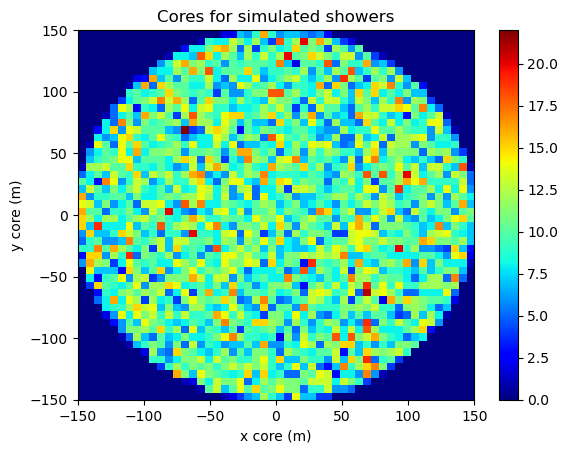

In [43]:
plt.hist2d(xcores_sim, ycores_sim, bins=(50, 50), cmap=plt.cm.jet)
telescope1 = [-70.93, -52.07]
telescope2 = [-35.27, 66.14]
telescope3 = [75.28, 50.49]
telescope4 = [30.91, -64.54]
# plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for simulated showers')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('SimCoresElectrons_617.png')
plt.show()

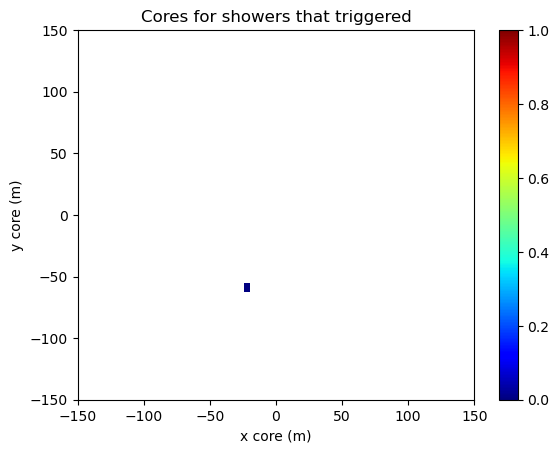

In [37]:
plt.hist2d(xcores, ycores, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for showers that triggered')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('TrigCoresElectrons_617.png')
plt.show()

In [15]:
# Off axis angle analysis
for filename in FilenamesList:
    with SimTelFile(filename) as f:
        evt_iter = f.iter_array_events()
        Alts_temp = []
        Azimuths_temp = []
        for event in evt_iter:
            Alts_temp.append(event['mc_shower']['altitude'])
            Azimuths_temp.append(event['mc_shower']['azimuth'])  
            #print(event)
        Alts.extend(Alts_temp)
        Azimuths.extend(Azimuths_temp)
print("Alts", Alts, "length", len(Alts))

Alts [] length 0


In [16]:
theta1 = (math.pi/2) - source.mc_run_headers[0]['alt_range'][1]
phi1 = source.mc_run_headers[0]['az_range'][1]
print("theta1",theta1,"phi1",phi1)

OffAxis = []

Dir1 = [math.sin(theta1)*math.cos(phi1), math.sin(theta1)*math.sin(phi1), math.cos(theta1)]
print(Dir1)
for i,j in zip(Alts, Azimuths):
    Zd = (math.pi/2) - i
    Az = j
    Dir2 = [math.sin(Zd)*math.cos(Az), math.sin(Zd)*math.sin(Az), math.cos(Zd)]
    DirVec1 = np.array(Dir1) 
    DirVec2 = np.array(Dir2)
    alpha = math.acos(np.dot(DirVec1,DirVec2))
    OffAxis.append((alpha*180)/math.pi)

theta1 -4.371139006309477e-08 phi1 3.1415927
[4.371139006309459e-08, 3.8213712371429325e-15, 0.999999999999999]


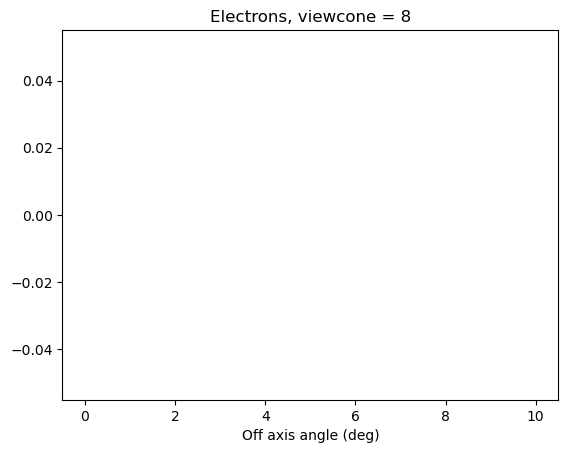

In [17]:
#bins = range(0,10,1)
bins = np.linspace(0,10,20)
fig, axes = plt.subplots()
bins_content, bins_edge, patches = plt.hist(OffAxis, bins = bins, label='Protons, DT=300mV, viewcone = 10')
plt.title('Electrons, viewcone = 8')
plt.xlabel('Off axis angle (deg)')
plt.show()
#plt.savefig('Electrons_viewcone.png')

In [ ]:
FilenamesList = glob.glob('simtel_*_run617.simtel.gz')
xcores = []  
ycores = []
xcores_sim = []
ycores_sim = []
Alts = []
Azimuths = []
PE = []
for filename in FilenamesList:
    print(filename)
    with SimTelFile(filename) as f:
        evt_iter = f.iter_array_events()
        xcores_temp = []
        ycores_temp = []
        for event in evt_iter:
            xcores_temp.append(event['mc_event']['xcore'])
            ycores_temp.append(event['mc_event']['ycore']) 
            #print(event['mc_event'])
        xcores.extend(xcores_temp)
        ycores.extend(ycores_temp)

for filename in FilenamesList:
    with SimTelFile(filename) as f:
        evt_mc_iter = f.iter_mc_events()
        xcores_sim_temp = []
        ycores_sim_temp = []    
        for event in evt_mc_iter:
            xcores_sim_temp.append(event['mc_event']['xcore'])
            ycores_sim_temp.append(event['mc_event']['ycore'])     
        xcores_sim.extend(xcores_sim_temp)
        ycores_sim.extend(ycores_sim_temp)

plt.hist2d(xcores_sim, ycores_sim, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for simulated showers')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('SimCoresElectrons_617.png')


plt.hist2d(xcores, ycores, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for showers that triggered')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('TrigCoresElectrons_617.png')